## Telcom Churn Prediction
The data set hat 5’986 customers.

**Goal:**

Which customers are likely to churn? What are the attributes that make you think so?


The features:

* customerID - customer id
* gender - client gender (male / female)
* SeniorCitizen - is the client retired (1, 0)
* Partner - is the client married (Yes, No)
* tenure - how many months a person has been a client of the company
* PhoneService - is the telephone service connected (Yes, No)
* MultipleLines - are multiple phone lines connected (Yes, No, No phone service)
* InternetService - client’s Internet service provider (DSL, Fiber optic, No)
* OnlineSecurity - is the online security service connected (Yes, No, No internet service)
* OnlineBackup - is the online backup service activated (Yes, No, No internet service)
* DeviceProtection - does the client have equipment insurance (Yes, No, No internet service)
* TechSupport - is the technical support service connected (Yes, No, No internet service)
* StreamingTV - is the streaming TV service connected (Yes, No, No internet service)
* StreamingMovies - is the streaming cinema service activated (Yes, No, No internet service)
* Contract - type of customer contract (Month-to-month, One year, Two year)
* PaperlessBilling - whether the client uses paperless billing (Yes, No)
* PaymentMethod - payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
* MonthlyCharges - current monthly payment
* TotalCharges - the total amount that the client paid for the services for the entire time
* Churn - whether there was a churn (Yes or No)

#### This is a binary supervised machine learning problem.

In [7]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector as selector

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.metrics import confusion_matrix, classification_report, f1_score
from sklearn.model_selection import cross_val_score

## Looking and Cleaning the data

In [8]:
path = "../data/telecom_users.csv"
df = pd.read_csv(path)
df.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


In [9]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace=True)


C:\Users\User\AppData\Local\Temp\ipykernel_12660\2976925233.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace=True)


In [10]:
print(df.shape)
df.drop(columns=["Unnamed: 0","customerID"], inplace=True)
unique = {}
type_counts = {}
nan_counts = {}

for col in df.columns:
    unique[col] = df[col].nunique()
    type_counts[col] = df[col].dtype
    nan_counts[col] = df[col].isna().sum()

df_unique = pd.DataFrame({
    "n_unique" : unique,
    "dtype" : type_counts, 
    "n_nan": nan_counts}
)
df_unique

(5986, 22)


,n_unique,dtype,n_nan
gender,2,object,0
SeniorCitizen,2,int64,0
Partner,2,object,0
Dependents,2,object,0
tenure,73,int64,0
PhoneService,2,object,0
MultipleLines,3,object,0
InternetService,3,object,0
OnlineSecurity,3,object,0
OnlineBackup,3,object,0


## EDA - Visualiation


gender:
gender     Female       Male
Churn                       
No      48.761082  51.238918
Yes     49.842470  50.157530


<Figure size 800x600 with 0 Axes>

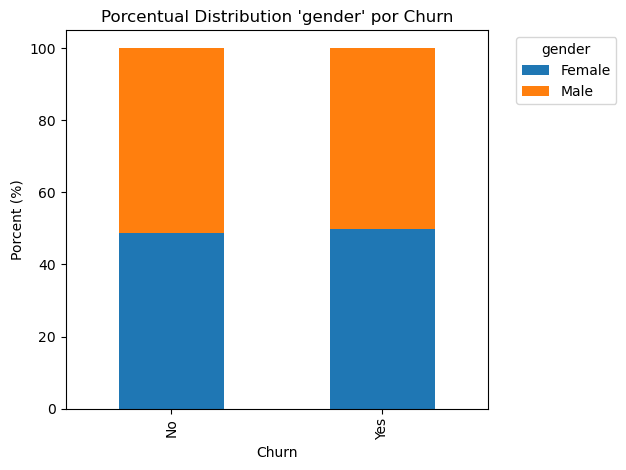


Partner:
Partner         No        Yes
Churn                        
No       47.078882  52.921118
Yes      63.705104  36.294896


<Figure size 800x600 with 0 Axes>

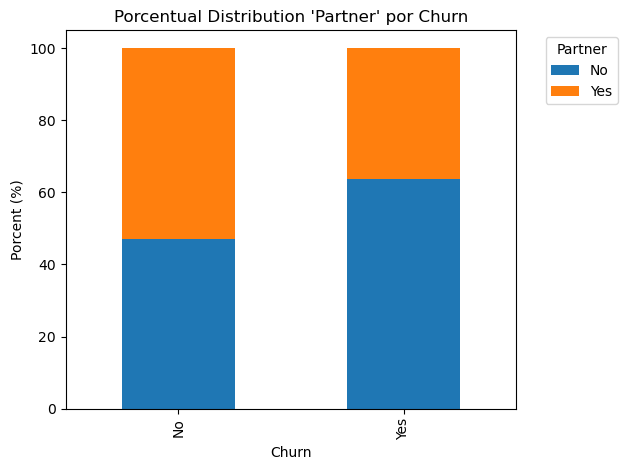


Dependents:
Dependents         No        Yes
Churn                           
No          65.674017  34.325983
Yes         82.293636  17.706364


<Figure size 800x600 with 0 Axes>

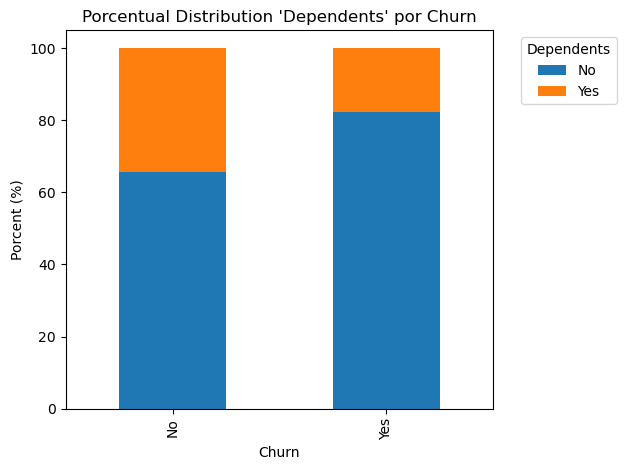


PhoneService:
PhoneService         No        Yes
Churn                             
No            10.025006  89.974994
Yes            9.388784  90.611216


<Figure size 800x600 with 0 Axes>

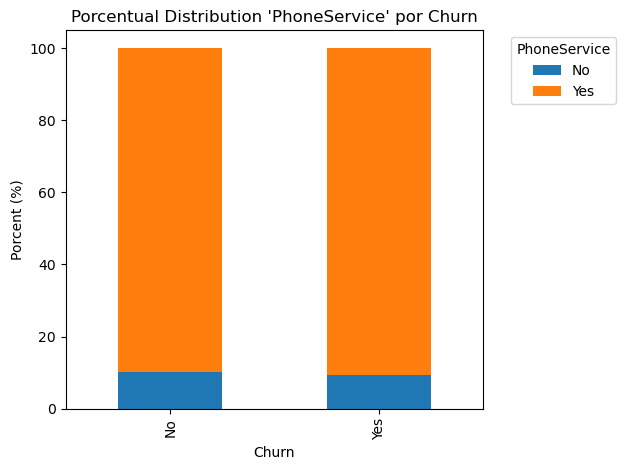


MultipleLines:
MultipleLines         No  No phone service        Yes
Churn                                                
No             48.488293         10.025006  41.486702
Yes            45.053560          9.388784  45.557656


<Figure size 800x600 with 0 Axes>

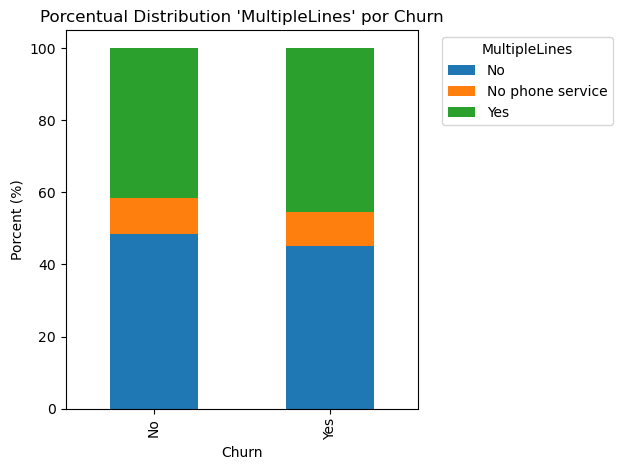


InternetService:
InternetService        DSL  Fiber optic         No
Churn                                             
No               37.985906    34.917027  27.097068
Yes              25.015753    68.746062   6.238185


<Figure size 800x600 with 0 Axes>

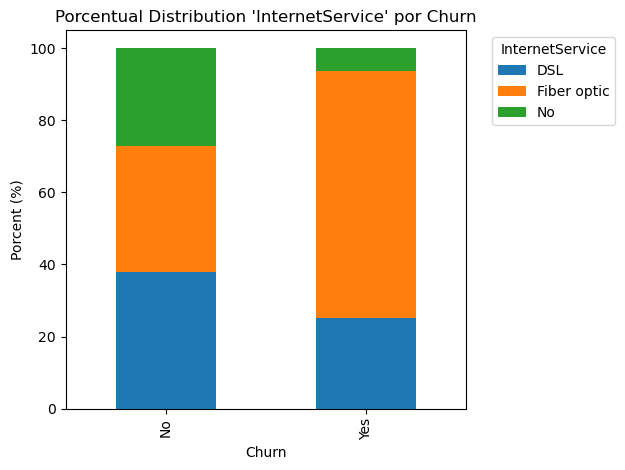


OnlineSecurity:
OnlineSecurity         No  No internet service        Yes
Churn                                                    
No              39.554444            27.097068  33.348488
Yes             78.260870             6.238185  15.500945


<Figure size 800x600 with 0 Axes>

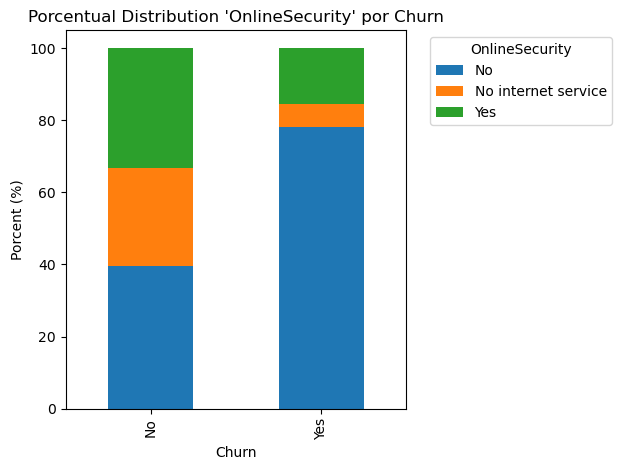


OnlineBackup:
OnlineBackup         No  No internet service        Yes
Churn                                                  
No            35.621732            27.097068  37.281200
Yes           65.406427             6.238185  28.355388


<Figure size 800x600 with 0 Axes>

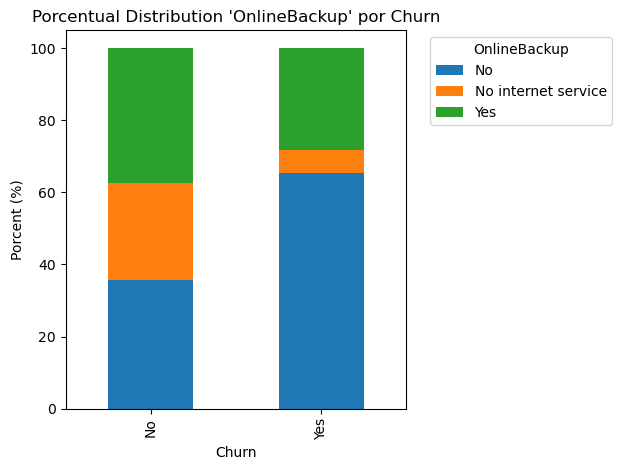


DeviceProtection:
DeviceProtection         No  No internet service        Yes
Churn                                                      
No                36.576495            27.097068  36.326438
Yes               64.965343             6.238185  28.796471


<Figure size 800x600 with 0 Axes>

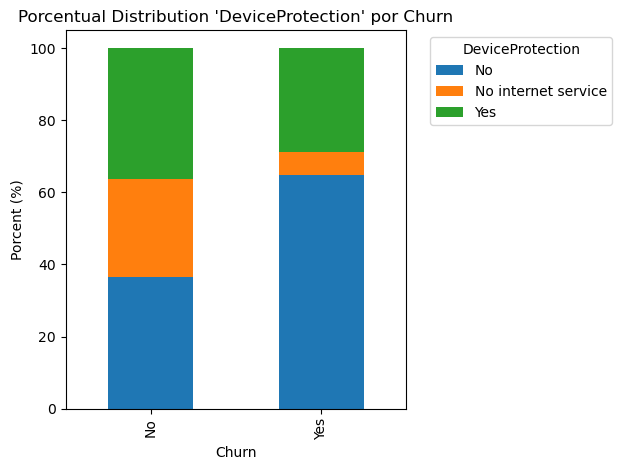


TechSupport:
TechSupport         No  No internet service        Yes
Churn                                                 
No           39.508979            27.097068  33.393953
Yes          77.000630             6.238185  16.761185


<Figure size 800x600 with 0 Axes>

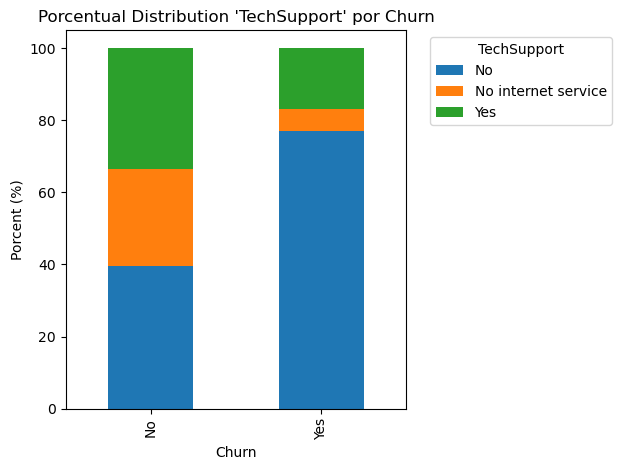


StreamingTV:
StreamingTV         No  No internet service        Yes
Churn                                                 
No           36.144578            27.097068  36.758354
Yes          50.346566             6.238185  43.415249


<Figure size 800x600 with 0 Axes>

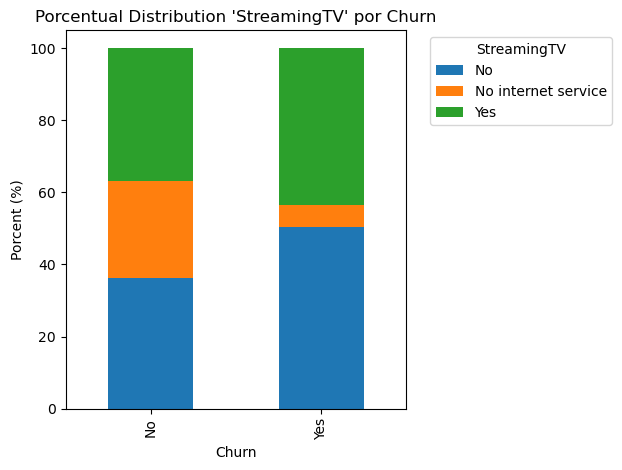


StreamingMovies:
StreamingMovies         No  No internet service        Yes
Churn                                                     
No               35.553535            27.097068  37.349398
Yes              49.905482             6.238185  43.856333


<Figure size 800x600 with 0 Axes>

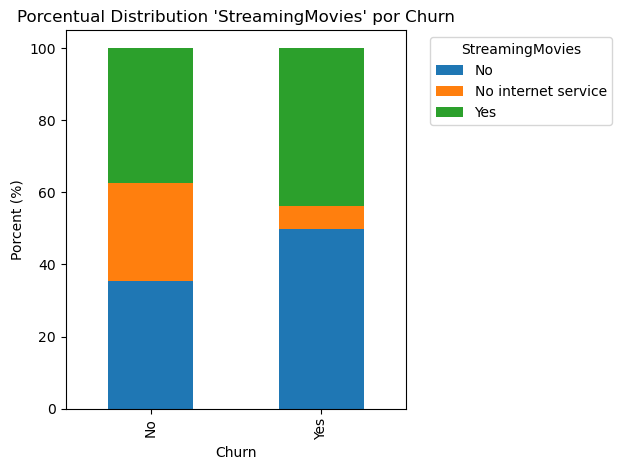


Contract:
Contract  Month-to-month   One year   Two year
Churn                                         
No             42.532394  25.642191  31.825415
Yes            88.090737   9.325772   2.583491


<Figure size 800x600 with 0 Axes>

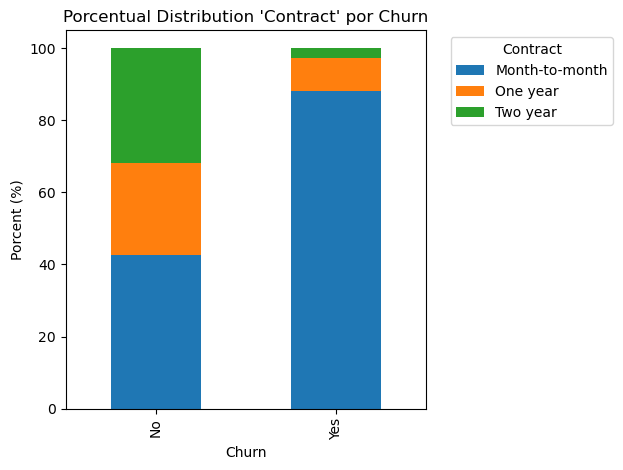


PaperlessBilling:
PaperlessBilling         No        Yes
Churn                                 
No                46.646965  53.353035
Yes               25.582861  74.417139


<Figure size 800x600 with 0 Axes>

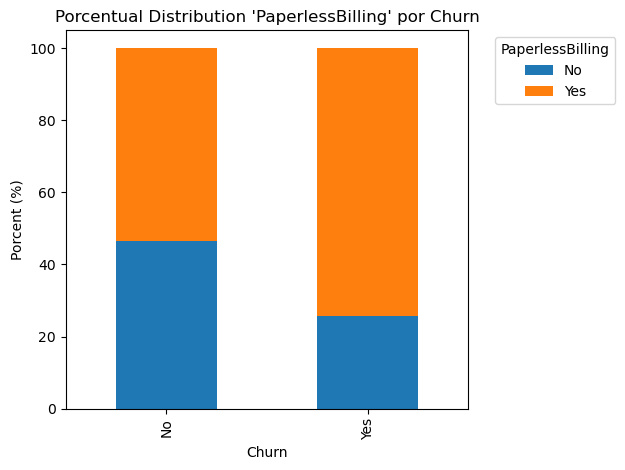


PaymentMethod:
PaymentMethod  Bank transfer (automatic)  Credit card (automatic)  \
Churn                                                               
No                             24.641964                25.119345   
Yes                            14.114682                12.476371   

PaymentMethod  Electronic check  Mailed check  
Churn                                          
No                    25.096613     25.142078  
Yes                   56.836799     16.572149  


<Figure size 800x600 with 0 Axes>

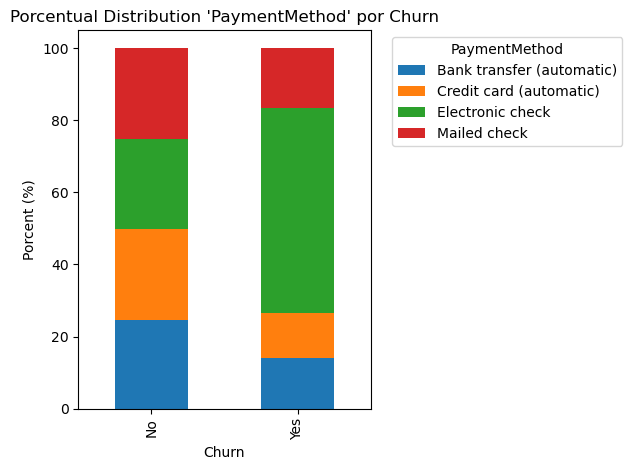


Churn:
Churn     No    Yes
Churn              
No     100.0    0.0
Yes      0.0  100.0


<Figure size 800x600 with 0 Axes>

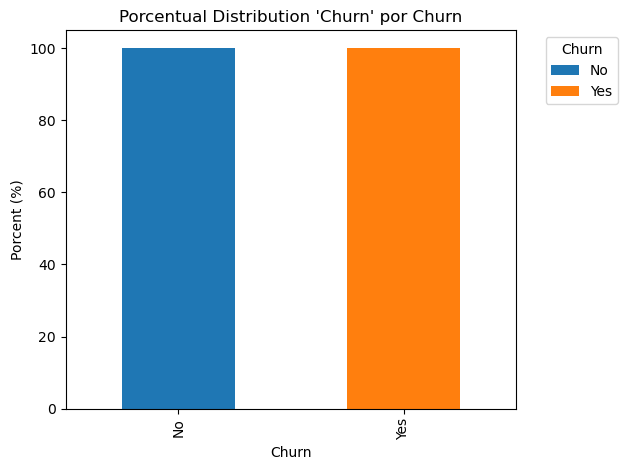

In [11]:
cat_Columns = df.select_dtypes(include=["object"]).columns.tolist()
num_Columns = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
for col in cat_Columns:
    table = pd.crosstab(df["Churn"], df[col], normalize='index') * 100
    print(f"\n{col}:")
    print(table)
    plt.figure(figsize=(8, 6))
    table.plot(kind="bar", stacked=True)

    plt.ylabel("Porcent (%)")
    plt.title(f"Porcentual Distribution '{col}' por Churn")
    plt.legend(title=col, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()


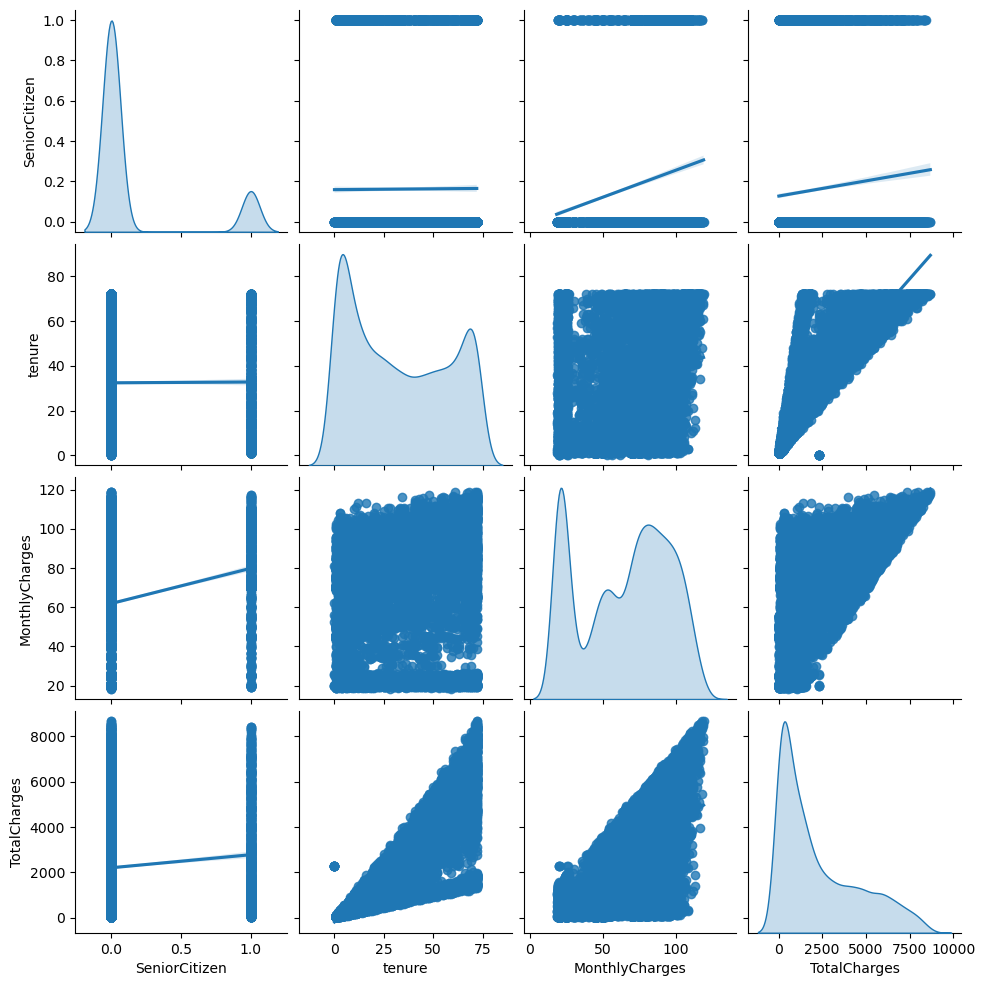

In [12]:

sns.pairplot(df[num_Columns], kind="reg", diag_kind="kde")
plt.show()

# Preparation of the Pipeline

## 1. Select the Features and Target columns

In [13]:
X = df.drop("Churn", axis=1)
y = df["Churn"].map({"No": 0, "Yes": 1})


## 2. Separate the numerical and categorical features

In [14]:
num_features = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
cat_features = X.select_dtypes(include=["object"]).columns.tolist()

## 3. Define Categorical Transformer Pipeline


In [15]:
categorical_transformer = Pipeline(steps=[
    ("onehot", OneHotEncoder(sparse_output=False,handle_unknown="ignore"
                             ).set_output(transform="pandas"))
                                          ])
categorical_transformer

,steps,"[('onehot', ...)]"
,transform_input,None
,memory,None
,verbose,False
,categories,'auto'
,drop,None
,sparse_output,False
,dtype,<class 'numpy.float64'>
,handle_unknown,'ignore'
,min_frequency,None
,max_categories,None


## 4. Define Numeric Transformer Pipeline

In [16]:
numeric_transformer = Pipeline(steps=[
    ("scaler", StandardScaler().set_output(transform="pandas"))
                                      ])

numeric_transformer

,steps,"[('scaler', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True


## 5. Define Column Transformer Pipeline for preprocessing

In [17]:
preprocessor = ColumnTransformer(transformers=[
    ("num", numeric_transformer, num_features),
    ("cat", categorical_transformer, cat_features)
    ]).set_output(transform="pandas")
preprocessor

,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,copy,True
,with_mean,True
,with_std,True


In [18]:
scores = {}

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=47)
X_train.shape, X_test.shape

((4788, 19), (1198, 19))

## 6. Initialize and Select the Models


#### 6.1. KNN Model

In [20]:
knn = KNeighborsClassifier(n_neighbors=5)
pipeline_knn = Pipeline([("pre_process", preprocessor),
                         ("model", knn)])
pipeline_knn

,steps,"[('pre_process', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [21]:
pipeline_knn.fit(X_train, y_train)
y_pred = pipeline_knn.predict(X_test)

class_labels = pipeline_knn.named_steps['model'].classes_

print(classification_report(y_test, y_pred))

pd.DataFrame(confusion_matrix(y_test, y_pred),
             columns=class_labels, index=class_labels)

              precision    recall  f1-score   support

           0       0.84      0.82      0.83       866
           1       0.55      0.58      0.57       332

    accuracy                           0.75      1198
   macro avg       0.69      0.70      0.70      1198
weighted avg       0.76      0.75      0.75      1198



,0,1
0,707,159
1,138,194


In [22]:
scores['knn'] = round(f1_score(y_test, y_pred, average='weighted'), 3)

#### 6.2. Naive Bayes Model

In [23]:
nb = BernoulliNB()
pipeline_nb = Pipeline([("pre_process", preprocessor),
                         ("model", nb)])
pipeline_nb

,steps,"[('pre_process', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [24]:
pipeline_nb.fit(X_train, y_train)
y_pred = pipeline_nb.predict(X_test)

class_labels = pipeline_nb.named_steps['model'].classes_

print(classification_report(y_test, y_pred))

pd.DataFrame(confusion_matrix(y_test, y_pred),
             columns=class_labels, index=class_labels)

              precision    recall  f1-score   support

           0       0.92      0.69      0.79       866
           1       0.51      0.84      0.64       332

    accuracy                           0.73      1198
   macro avg       0.72      0.77      0.71      1198
weighted avg       0.81      0.73      0.75      1198



,0,1
0,601,265
1,53,279


In [25]:
scores['nb'] = round(f1_score(y_test, y_pred, average='weighted'), 3)

#### 6.3. Linear SVC

In [26]:
svc = LinearSVC(random_state=42, max_iter=10000)
pipeline_svc = Pipeline([("pre_process", preprocessor),
                         ("model", svc)])
pipeline_svc.fit(X_train, y_train)
y_pred = pipeline_svc.predict(X_test)

class_labels = pipeline_svc.named_steps['model'].classes_

print(classification_report(y_test, y_pred))


scores['svm'] = round(f1_score(y_test, y_pred, average='weighted'), 3)
pd.DataFrame(confusion_matrix(y_test, y_pred),
             columns=class_labels, index=class_labels)

              precision    recall  f1-score   support

           0       0.83      0.88      0.86       866
           1       0.64      0.55      0.59       332

    accuracy                           0.79      1198
   macro avg       0.74      0.71      0.72      1198
weighted avg       0.78      0.79      0.78      1198



,0,1
0,763,103
1,151,181


### 6.5 Decision Tree

In [27]:
preprocessor_new = ColumnTransformer(
    transformers=[
        ("num", "passthrough", num_features),
        ("cat", categorical_transformer, cat_features),
    ]
)

In [28]:
dtree = DecisionTreeClassifier(random_state=42)
pipeline_dtree = Pipeline([("pre_process", preprocessor_new),
                         ("model", dtree)])

pipeline_dtree.fit(X_train, y_train)
y_pred = pipeline_dtree.predict(X_test)

class_labels = pipeline_dtree.named_steps['model'].classes_

print(classification_report(y_test, y_pred))
scores['dtree'] = round(f1_score(y_test, y_pred, average='weighted'), 3)
pd.DataFrame(confusion_matrix(y_test, y_pred),
             columns=class_labels, index=class_labels)

              precision    recall  f1-score   support

           0       0.80      0.79      0.79       866
           1       0.47      0.49      0.48       332

    accuracy                           0.71      1198
   macro avg       0.64      0.64      0.64      1198
weighted avg       0.71      0.71      0.71      1198



,0,1
0,682,184
1,169,163


### 6.6. Random Forest Tree

In [29]:
rf = RandomForestClassifier(random_state=42)
pipeline_rf = Pipeline([("pre_process", preprocessor_new),
                         ("model", rf)])
pipeline_rf.fit(X_train, y_train)
y_pred = pipeline_rf.predict(X_test)

class_labels = pipeline_rf.named_steps['model'].classes_

print(classification_report(y_test, y_pred))
scores['rf'] = round(f1_score(y_test, y_pred, average='weighted'), 3)
pd.DataFrame(confusion_matrix(y_test, y_pred),
             columns=class_labels, index=class_labels)

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       866
           1       0.61      0.50      0.55       332

    accuracy                           0.77      1198
   macro avg       0.71      0.69      0.70      1198
weighted avg       0.76      0.77      0.76      1198



,0,1
0,759,107
1,166,166


### 6.7. Gradiente Boosting 

In [30]:
gbm = GradientBoostingClassifier(random_state=42)
pipeline_gbm = Pipeline([("pre_process", preprocessor_new),
                         ("model", gbm)])
pipeline_gbm.fit(X_train, y_train)
y_pred = pipeline_gbm.predict(X_test)

class_labels = pipeline_gbm.named_steps['model'].classes_

print(classification_report(y_test, y_pred))
scores['gbm'] = round(f1_score(y_test, y_pred, average='weighted'), 3)
pd.DataFrame(confusion_matrix(y_test, y_pred),
             columns=class_labels, index=class_labels)

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       866
           1       0.65      0.54      0.59       332

    accuracy                           0.79      1198
   macro avg       0.74      0.71      0.72      1198
weighted avg       0.78      0.79      0.78      1198



,0,1
0,769,97
1,154,178


### 6.8. Extreme Gradient Boosting (XGBoost)

In [31]:
xgb = XGBClassifier(random_state=42)
pipeline_xgb = Pipeline([("pre_process", preprocessor_new),
                         ("model", xgb)])

pipeline_xgb.fit(X_train, y_train)
y_pred = pipeline_xgb.predict(X_test)

class_labels = pipeline_xgb.named_steps['model'].classes_

print(classification_report(y_test, y_pred))
scores['xgb'] = round(f1_score(y_test, y_pred, average='weighted'), 3)
pd.DataFrame(confusion_matrix(y_test, y_pred),
             columns=class_labels, index=class_labels)

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       866
           1       0.58      0.50      0.53       332

    accuracy                           0.76      1198
   macro avg       0.70      0.68      0.69      1198
weighted avg       0.75      0.76      0.75      1198



,0,1
0,746,120
1,167,165


In [32]:
from sklearn.ensemble import AdaBoostClassifier

ada_boost = AdaBoostClassifier(random_state=42)
pipeline_ada_boost = Pipeline([("pre_process", preprocessor_new),
                         ("model", ada_boost)])
pipeline_ada_boost.fit(X_train, y_train)
y_pred = pipeline_ada_boost.predict(X_test)

class_labels = pipeline_ada_boost.named_steps['model'].classes_

print(classification_report(y_test, y_pred))
scores['ada_boost'] = round(f1_score(y_test, y_pred, average='weighted'), 3)
pd.DataFrame(confusion_matrix(y_test, y_pred),
             columns=class_labels, index=class_labels)

              precision    recall  f1-score   support

           0       0.83      0.88      0.85       866
           1       0.63      0.53      0.58       332

    accuracy                           0.78      1198
   macro avg       0.73      0.71      0.72      1198
weighted avg       0.78      0.78      0.78      1198



,0,1
0,762,104
1,155,177


## 7. Compare the Models perfomances

In [33]:
result = pd.DataFrame({
    "Model" : scores.keys(),
    'F1-Score': scores.values()
})

result

,Model,F1-Score
0,knn,0.754
1,nb,0.748
2,svm,0.783
3,dtree,0.707
4,rf,0.765
5,gbm,0.784
6,xgb,0.754
7,ada_boost,0.778


The best model is gbm, with the F1-Scores


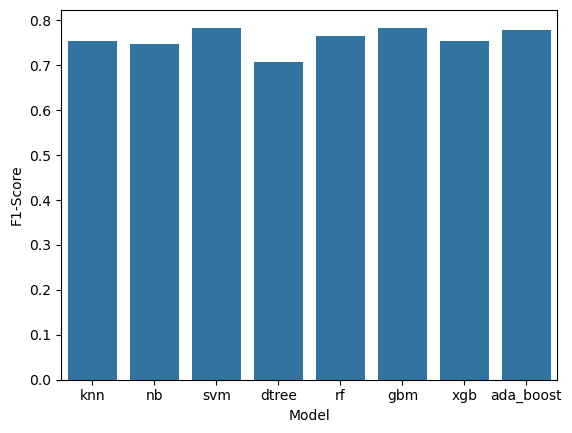

In [34]:
# plt.figure(figsize=(14,6))
best_model_F1 = result.loc[result["F1-Score"].idxmax(), "Model"]
print(f"The best model is {best_model_F1}, with the F1-Scores")
sns.barplot(data=result, x="Model", y="F1-Score");
# plt.show()

In [35]:
scores_cv = {}
scores_cv['knn'] = cross_val_score(pipeline_knn, X_train, y_train, cv=3, scoring='f1_weighted')
scores_cv['nb'] = cross_val_score(pipeline_nb, X_train, y_train, cv=3, scoring='f1_weighted')
scores_cv['svm'] = cross_val_score(pipeline_svc, X_train, y_train, cv=3, scoring='f1_weighted')
scores_cv['dtree'] = cross_val_score(pipeline_dtree, X_train, y_train, cv=3, scoring='f1_weighted')
scores_cv['rf'] = cross_val_score(pipeline_rf, X_train, y_train, cv=3, scoring='f1_weighted')
scores_cv['gbm'] = cross_val_score(pipeline_gbm, X_train, y_train, cv=3, scoring='f1_weighted')
# y_train already contains 0 and 1, so no label encoding needed
scores_cv['xgb'] = cross_val_score(pipeline_xgb, X_train, y_train, cv=3, scoring='f1_weighted')

In [36]:
result_F1 = pd.DataFrame({
    "Model" : scores_cv.keys(),
    'F1-Score': [round(np.mean(scores), 3) for scores in scores_cv.values()]
})

result_F1

,Model,F1-Score
0,knn,0.767
1,nb,0.737
2,svm,0.795
3,dtree,0.729
4,rf,0.778
5,gbm,0.790
6,xgb,0.772


The best model is svm, with the Cross Valuation Score


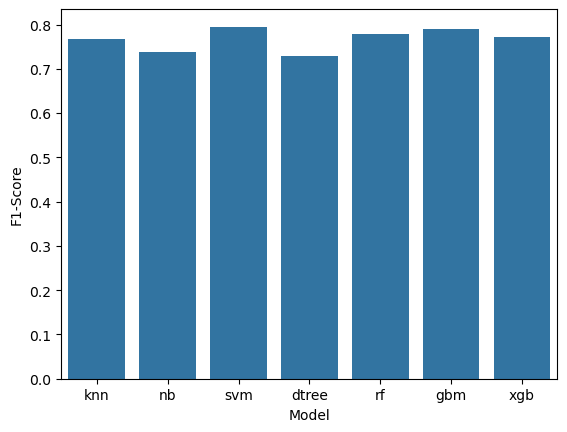

In [37]:
best_model = result_F1.loc[result_F1["F1-Score"].idxmax(), "Model"]
print(f"The best model is {best_model}, with the Cross Valuation Score")
sns.barplot(data=result_F1, x="Model", y="F1-Score");


In [38]:
from imblearn.over_sampling import SMOTE

X_train_processed = preprocessor_new.fit_transform(X_train)
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(
    X_train_processed, y_train)

In [39]:
X_train_resampled.dtype

dtype('float64')

### 6.7. New Gradiente Boosting with Smote in the X_train

In [40]:
gbm_resampled = GradientBoostingClassifier(random_state=42)
gbm_resampled.fit(X_train_resampled, y_train_resampled)

X_test_processed = preprocessor_new.transform(X_test)
y_pred = gbm_resampled.predict(X_test_processed)

class_labels = gbm_resampled.classes_

print(classification_report(y_test, y_pred))
scores['gbm_new'] = round(f1_score(y_test, y_pred, average='weighted'), 3)

pd.DataFrame(confusion_matrix(y_test, y_pred),
             columns=class_labels, index=class_labels)


              precision    recall  f1-score   support

           0       0.85      0.86      0.86       866
           1       0.62      0.61      0.61       332

    accuracy                           0.79      1198
   macro avg       0.74      0.73      0.74      1198
weighted avg       0.79      0.79      0.79      1198



,0,1
0,745,121
1,131,201


In [41]:
X_test_processed.dtype

dtype('float64')

In [42]:
X_train_resampled.dtype

dtype('float64')

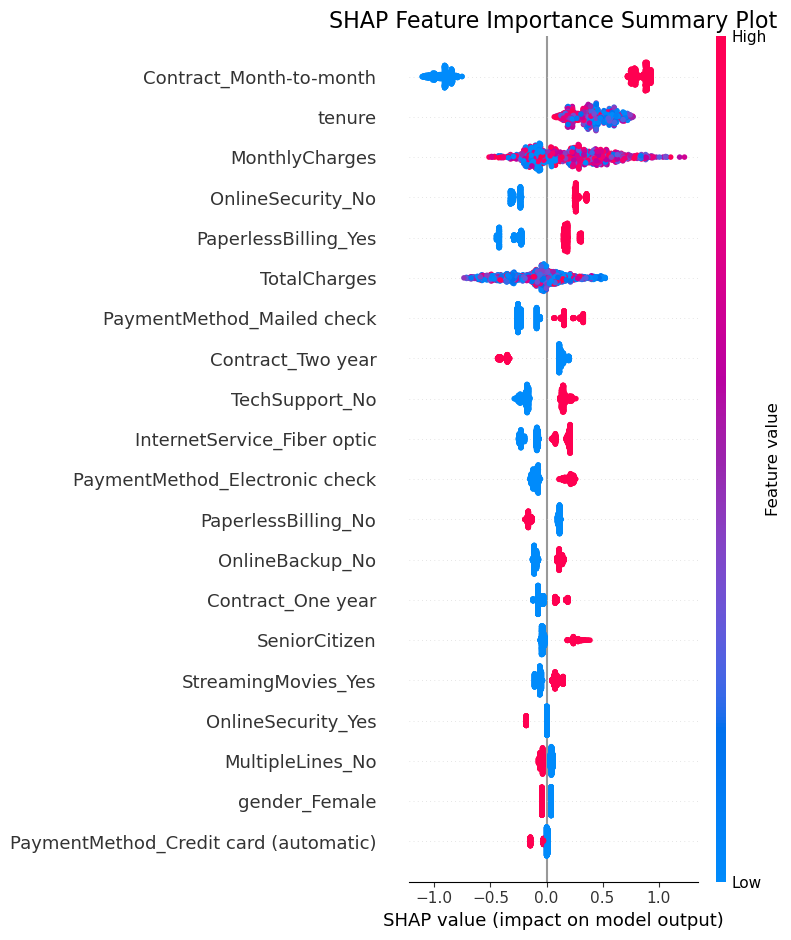

SHAP summary plot generated for Gradient Boosting Classifier.


In [43]:
import shap

explainer = shap.TreeExplainer(gbm)

X_test_shap = preprocessor.transform(X_test)

shap_values = explainer.shap_values(X_test_shap)

feature_names = X_test_shap.columns.tolist()
list_feature_names = [ s[5:] for s in feature_names]

plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values, X_test_shap, feature_names=list_feature_names, show=False)
plt.title('SHAP Feature Importance Summary Plot', fontsize=16)
plt.tight_layout()
plt.show()

print("SHAP summary plot generated for Gradient Boosting Classifier.")

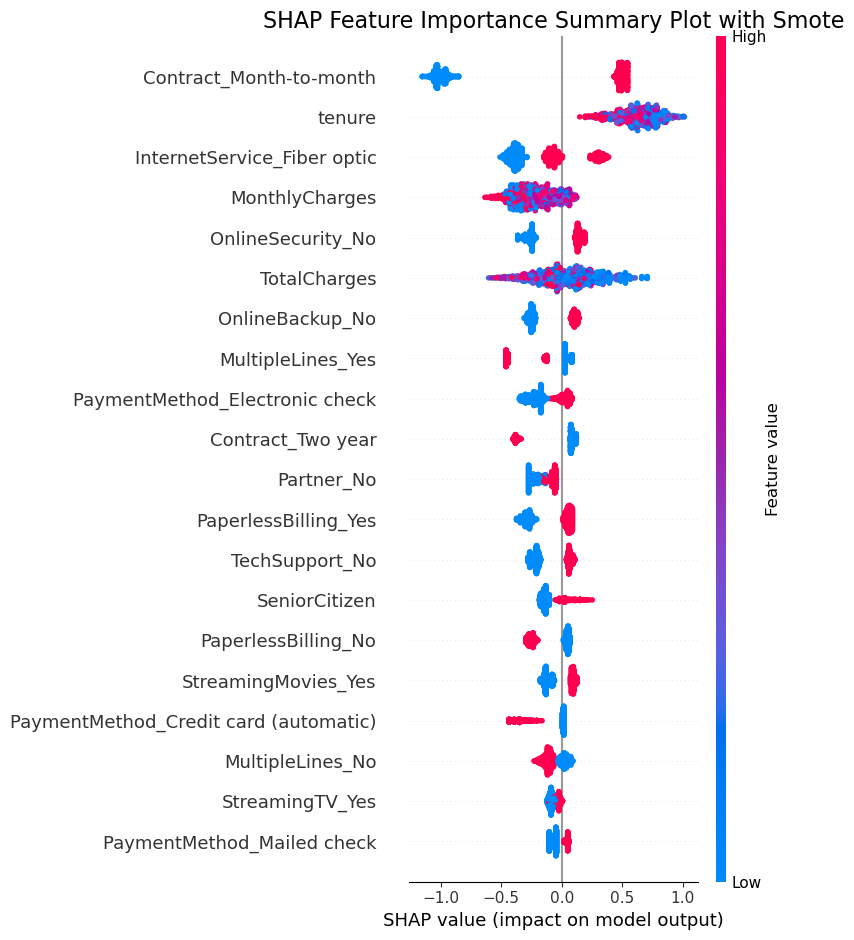

SHAP summary plot generated for Gradient Boosting Classifier.


In [45]:
explainer = shap.TreeExplainer(gbm_resampled)

X_test_shap_new = preprocessor.transform(X_test)

shap_values = explainer.shap_values(X_test_shap_new)

feature_names = X_test_shap_new.columns.tolist()
list_feature_names = [ s[5:] for s in feature_names]

plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values, X_test_shap_new, feature_names=list_feature_names, show=False)
plt.title('SHAP Feature Importance Summary Plot with Smote', fontsize=16)
plt.tight_layout()
plt.show()

print("SHAP summary plot generated for Gradient Boosting Classifier.")